# Домашнее задание 1 (Краснов Александр - АДД32)

tg: [@mr_krax](https://telegram.me/mr_krax)  
email: alankrasnov@edu.hse.ru

----

### 1. Даны два отсортированных списка, соедините их в один отсортированный список за минимальное возможное кол-во операций


    Входные данные: [1,2,3], [3,4,5]
    Выходные данные: [1,2,3,3,4,5]

    Входные данные: [1,1,1], [1,40,50]
    Выходные данные: [1,1,1,1,40,50]

In [215]:
def run_tests(func, test_set):
  for test_id, test in test_set.items():
    res = func(*test['in'])
    expected = test['expected']
    assert res == expected, f'test "{test_id}" failed:\n res = {res},\n expected = {expected}'
  
  print('OK')


In [214]:
def join_sorted(l_1: list, l_2: list):
  res = []
  while (l_1 and l_2):
      if l_1[0] < l_2[0]:
          res.append(l_1.pop(0))
      else:
          res.append(l_2.pop(0))
  res.extend(l_1 if l_1 else l_2)
  return res


test_set = {
    'test_1': {'in': [[1, 2, 3], [3, 4, 5]],
               'expected': [1, 2, 3, 3, 4, 5]},
    'test_2': {'in': [[1, 1, 1], [1, 40, 50]],
               'expected': [1, 1, 1, 1, 40, 50]}}

run_tests(join_sorted, test_set)


OK


### 2. Дано натуральное число, что может означать зашифрованное им сообщение


Дано натуральное число которое означает последовательность цифр, набранных на кнопочном телефоне (печатали короткую СМСку на русском/английском языке, как вам удобнее). Вывести все варианты того, что может введенная последовательность означать.

    Входные данные: digits = "23"
    Выходные данные: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

+ усложнение (опциональное). Попробуйте расшифровать наиболее вероятные введенные слова (вопросы можно задавать)

In [213]:
def gen_comb(digits: str):
    letters_by_digit = {'2': 'abc', '3': 'def', '4': 'ghi', '5': 'jkl',
                        '6': 'mno', '7': 'pqrs', '8': 'tuv', '9': 'wxyz'}
    res = letters_by_digit[digits[0]]

    for d in digits[1:]:
      letters = letters_by_digit[d]
      res = [r + l for r in res for l in letters]
    return res


test_set = {
    'test_1': {'in': ["23"],
               'expected': ["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"]}}

run_tests(gen_comb, test_set)


OK


### 3. На вход принимается число N.  Выведите на печать следующий паттерн:

1

1 2

1 2 3

1 2 3 4

...

1 ... N

In [212]:
def print_stairs(n: int):
  line = ""
  for i in range(1, n+1):
    line += f'{i} '
    print(line[:-1])
    
print_stairs(3)
print_stairs(10)

1
1 2
1 2 3
1
1 2
1 2 3
1 2 3 4
1 2 3 4 5
1 2 3 4 5 6
1 2 3 4 5 6 7
1 2 3 4 5 6 7 8
1 2 3 4 5 6 7 8 9
1 2 3 4 5 6 7 8 9 10


### 4. Посчитать среднюю метрику X-DSPAM-Confidence для письма. 
### (Кажется, это что-то похожее на вероятность того, что письмо - не спам)

Воспользуйтесь предыдущим кодом, достаньте те строчки, где эта метрика записана и подсчитайте ее среднее значение

In [210]:

import re
import requests
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text


In [211]:

pattern = re.compile(r'X-DSPAM-Confidence: (.*)\n')
metrics = [float(m) for m in re.findall(pattern, mbox)]
mean_value = sum(metrics) / len(metrics)
print('X-DSPAM-Confidence (mean):', mean_value)

X-DSPAM-Confidence (mean): 0.8941280467445736


### 5. Объединение словарей

Напишите программу, которая подсчитывает значения из произвольного списка словарей следующего вида.

Ввод:

    shops = [{'товар': 'яблоки', 'количество': 400}, {'товар': 'конфеты', 'количество': 300}, {'товар': 'яблоки', 'количество': 750}]


Вывод:

    {'яблоки': 1150, 'конфеты': 300}

In [209]:
def sum_up(records: list):
  res = {}
  for rec in records:
    name = rec['товар']
    val = rec['количество']
    res[name] = (res.get(name) or 0) + val
  return res


test_set = {
    'test_1': {'in': [[{'товар': 'яблоки', 'количество': 400},
                       {'товар': 'конфеты', 'количество': 300},
                       {'товар': 'яблоки', 'количество': 750}]],
               'expected': {'яблоки': 1150, 'конфеты': 300}}}

run_tests(sum_up, test_set)


OK


### 6. Про Поросёнка Петра

На плоскости в точке (0,0) стоит Поросёнок Пётр. Он умеет ходить налево, направо, вверх и вниз. Расстояние его прохода в какую-либо сторону измеряется в шагах. Когда он идет вправо, его первая координата увеличивается, когда влево - уменьшается. Когда он идет вверх, его вторая координата увеличивается, а когда вниз - уменьшается. 

С клавиатуры считывается число N - число ходов, которые сделает Пётр. После чего на каждом шаге спрашивается, сколько шагов и в какую сторону за этот ход Пётр сделает. Так происходит, пока Пётр не осуществит все N ходов.

Программа должна вывести, сколько шагов Пётр должен был бы сделать, чтобы кратчайшим путем прибыть из свое начальной точки (0,0) в свою конечную точку. Напоминание: Пётр умеет ходить только вверх-вниз, и влево-вправо, но не по диагонали.

Пример ввода: 

    Введите N: 3
    Ход 1: Вверх 1
    Ход 2: Вниз 1
    Ход 3: Вверх 1
    
Пример вывода:

    Пётр находится на расстоянии 1 от (0,0)

In [208]:
def min_route(commands: list):
  x, y = 0, 0
  for c in commands:
    dr, len = c.split(' ')
    len = int(len)
    if dr == 'Вверх':
      y += len
    elif dr == 'Вниз':
      y -= len
    elif dr == 'Вправо':
      x += len
    elif dr == 'Влево':
      x -= len
  return abs(x)+abs(y)


test_set = {
    'test_1': {'in': [['Вверх 1', 'Вниз 1', 'Вверх 1']],
               'expected': 1},
    'test_2': {'in': [['Вверх 1', 'Вниз 3', 'Влево 1', 'Вправо 3']],
               'expected': 4}}

run_tests(min_route, test_set)


OK


### 7. Camel Case to snake case

Мы уже довольно много говорили про то, что в компаниях могут быть конвенции по обозначению переменных. Что, если вы написали код, а в нем переменные названы в Camel Case а вам требуется snake case? Пожалуй, стоит автоматизировать этот процесс. Напишите функцию, которая переводит название в camel case в название в snake case

In [207]:
# Camel case to snake case
import re


def camel_to_snake(text: str):
  res = re.compile('(.)([A-Z][a-z]+)').sub(r'\1_\2', text)
  res = re.compile('([a-z0-9])([A-Z])').sub(r'\1_\2', res).lower()
  return res.lower()


test_set = {
    'test_1': {'in': ['camelCaseVar'],
               'expected': 'camel_case_var'},
    'test_2': {'in': ['newCDCTopicConsumer'],
               'expected': 'new_cdc_topic_consumer'}}

run_tests(camel_to_snake, test_set)


OK


### 8. Про время (время неистово гуглить)
Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [206]:
def del_time(text: str):
  r = '([0-1][0-9]|2[0-3]):([0-5][0-9])(:[0-5][0-9])?'
  res = re.compile(r).sub('(TBD)', text)
  return res


inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

expected = """Уважаемые! Если вы к (TBD) не вернёте 
чемодан, то уже в (TBD) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

test_set = {'test_1': {'in': [inp], 'expected': expected}}
run_tests(del_time, test_set)


OK


### 9. Про финансовую отчетность (время неистово гуглить)

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [205]:
def falsify_report_2(text: str):
  """Not just Integers but also Floats"""
  r = r'(\d+(\.\d+)?)'
  def s(match: re.Match): 
    if match.groups()[1] == None :
      return f'{int(match.group()) ** 3}'
    return f'{float(match.group()) ** 3}'
  res = re.sub(r, s, text)
  return res

def falsify_report(text: str):
  res = re.sub('\d+', lambda x: f'{int(x.group()) ** 3}', text)
  return res

inp = """Было закуплено 12 единиц техники по 410.37 рублей."""
expected = """Было закуплено 1728 единиц техники по 68921000.50653 рублей."""

test_set = {'test_1': {'in': [inp], 'expected': expected}}
run_tests(falsify_report, test_set)


OK


### 10. Проверим закон Ципфа

В 1935, лингвист Джордж Ципф отметил, что в любом большом тексте *n*-тое наиболее часто встречающееся слово появляется с частотой  ~ 1/*n* от частоты наиболее часто встречающегося слова. Это наблюдение получило название *Закона Ципфа*, несмотря на то, что Феликс Ауэрбах заметил это еще в 1913 году.  Если нарисовать частоты слов в произвольном тексте, начиная от самого часто встречающегося, на log-log-графике, они должны приблизительно следовать прямой линии, если закон Ципфа верен.  Проверьте это :) В качестве примера текста предлагается Идиот Достоевского.

In [203]:
import re
import requests

the_idiot_url = 'https://www.gutenberg.org/cache/epub/2638/pg2638-images.html'
raw = requests.get(the_idiot_url)
txt = raw.text

# Индекс начала первой главы
start = re.search(r'Towards the end of November', txt).start()
# Индекс конца первой главы
end = re.search(r'to take a droshky', txt).end()
start, end

# clear all html tags
txt = re.sub(r'(<([^>]+)>)', '', txt)

In [191]:
pattern = re.compile("[a-zA-Z]+")
freq_by_word = {}
for word in re.findall(pattern, txt[start:end]):
  w = word.lower()
  freq_by_word[w] = freq_by_word.setdefault(w, 0) + 1
freq_by_word = sorted(freq_by_word.items(),
                      key=lambda item: item[1], reverse=True)

most_freq_w = freq_by_word[0]
print(f'The most frequent word: "{most_freq_w[0]}"')


The most frequent word: "the"


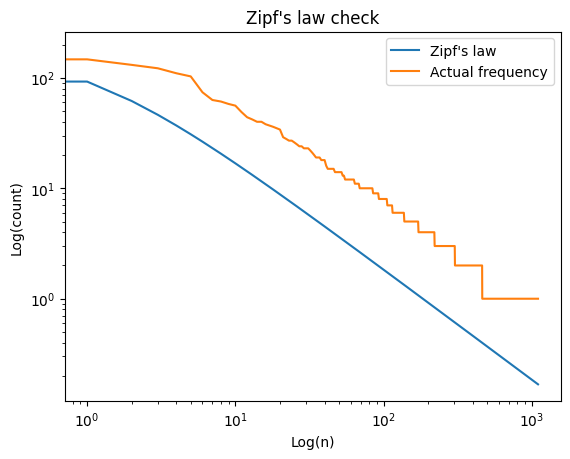

In [204]:
import matplotlib.pyplot as plt

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log(n)')
plt.ylabel('Log(count)')
plt.plot([most_freq_w[1] / i for i in range(1, len(freq_by_word) + 1)])
plt.plot([w[1] for w in freq_by_word])
plt.title('Zipf\'s law check')
plt.legend(['Zipf\'s law', 'Actual frequency'])
plt.show()


![](https://media.tenor.com/vje7Bbd41DMAAAAd/elmo-door.gif)